In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Initial data import

In [ ]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

FileNotFoundError: [Errno 2] No such file or directory: 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

### Fundamental distributions

In [2]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

FileNotFoundError: [Errno 2] No such file or directory: 'sorted_data.csv'

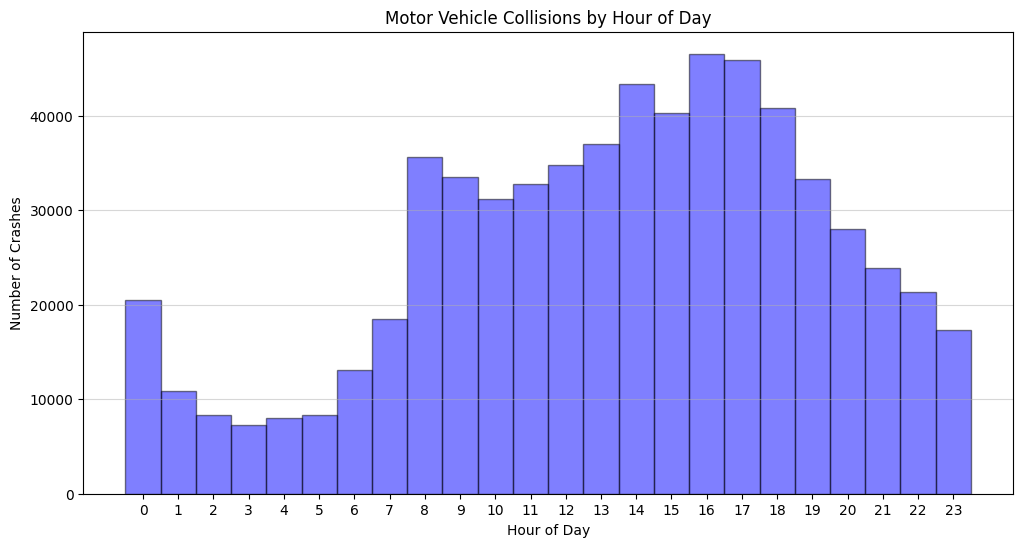

In [4]:
# Sort the time of day into hours only
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Plot the crashes at the time of day
plt.figure(figsize=(12, 6))
plt.hist(data['Hour'], bins=np.arange(0, 25) - 0.5, color='blue', alpha=0.5, edgecolor='black', align='mid')
plt.title('Motor Vehicle Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', alpha=0.5)
plt.show()


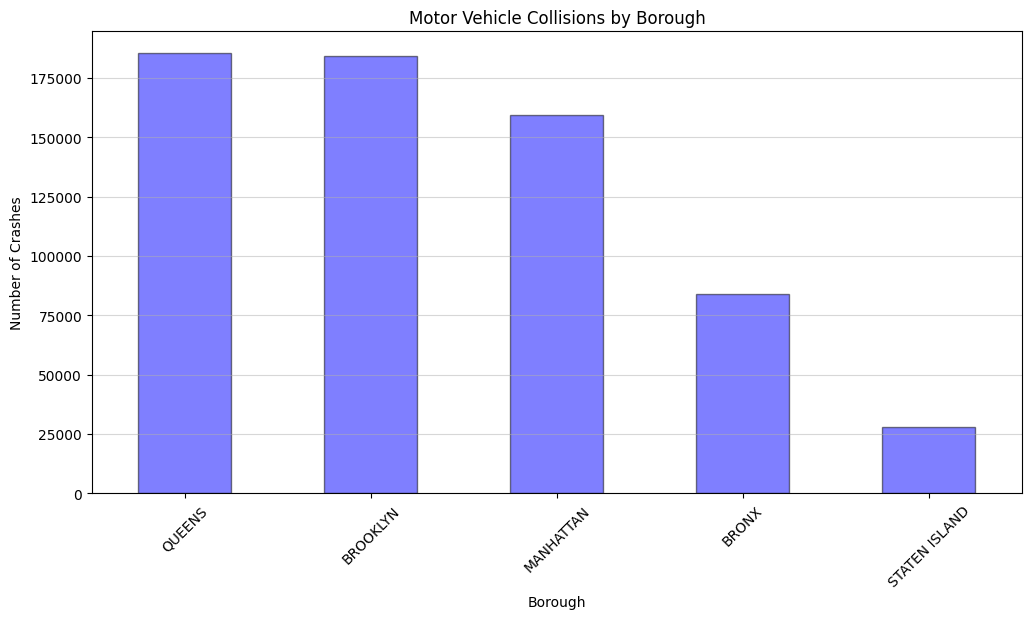

In [5]:
# Plot the crashes by borrough
plt.figure(figsize=(12, 6))
data['BOROUGH'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


#### Number of persons injured

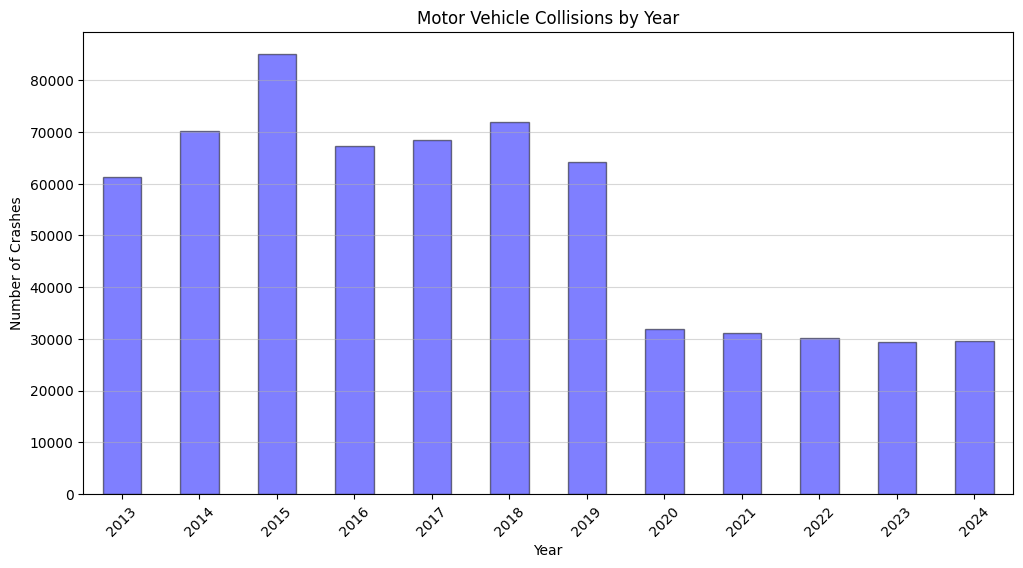

Year
2013    61375
2014    70159
2015    85139
2016    67309
2017    68557
2018    71973
2019    64286
2020    31823
2021    31164
2022    30259
2023    29359
2024    29574
Name: count, dtype: int64


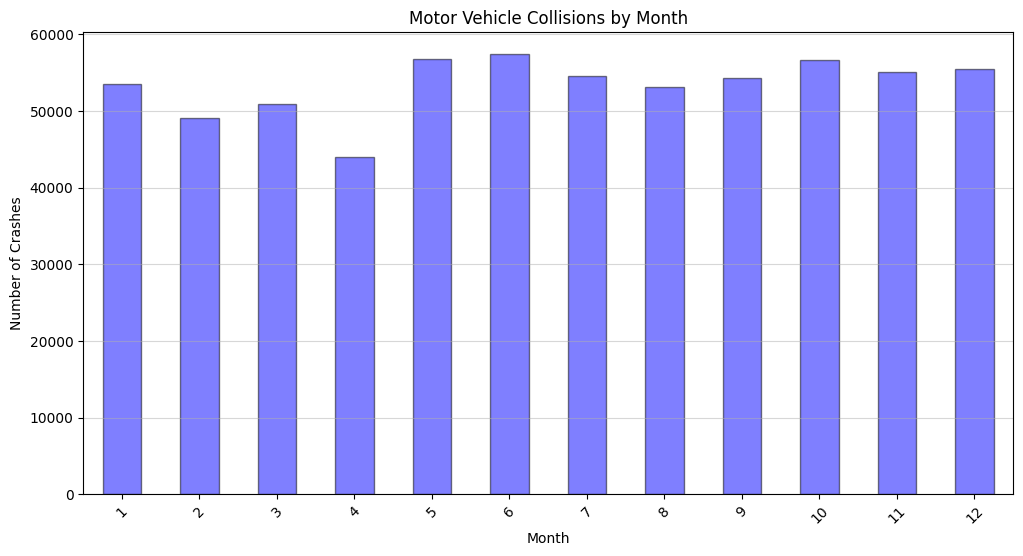

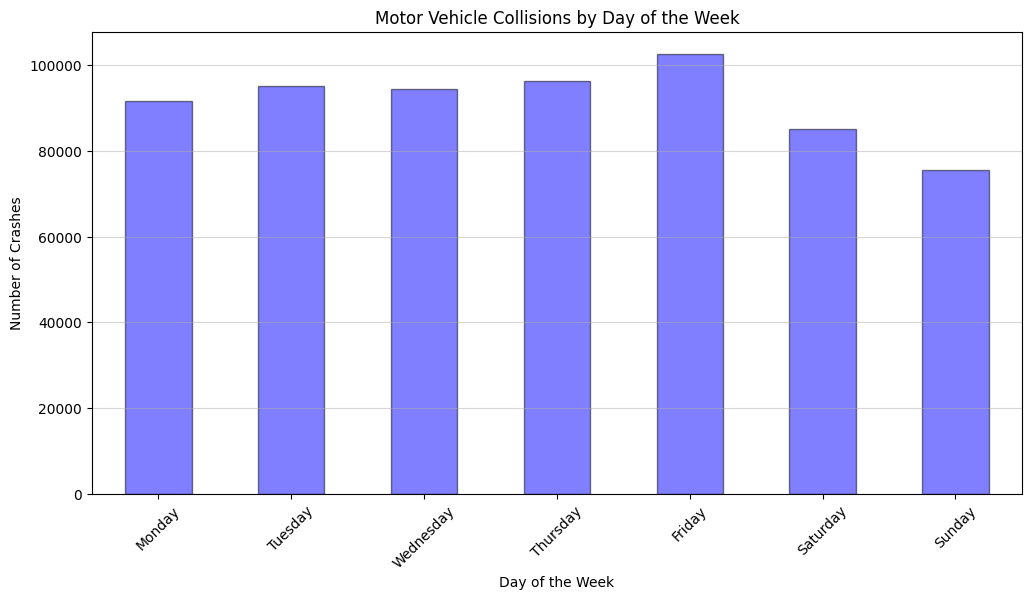

In [12]:
## Plot the crashes by year
plt.figure(figsize=(12, 6))
data['Year'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()
# Print total number of crashes per year
print(data['Year'].value_counts().sort_index()) 

# Plot the crashes by month
plt.figure(figsize=(12, 6))
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Month'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot the crashes by day of the week
plt.figure(figsize=(12, 6))
data['Day of Week'] = pd.to_datetime(data['CRASH DATE']).dt.day_name()
data['Day of Week'] = pd.Categorical(data['Day of Week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data['Day of Week'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()



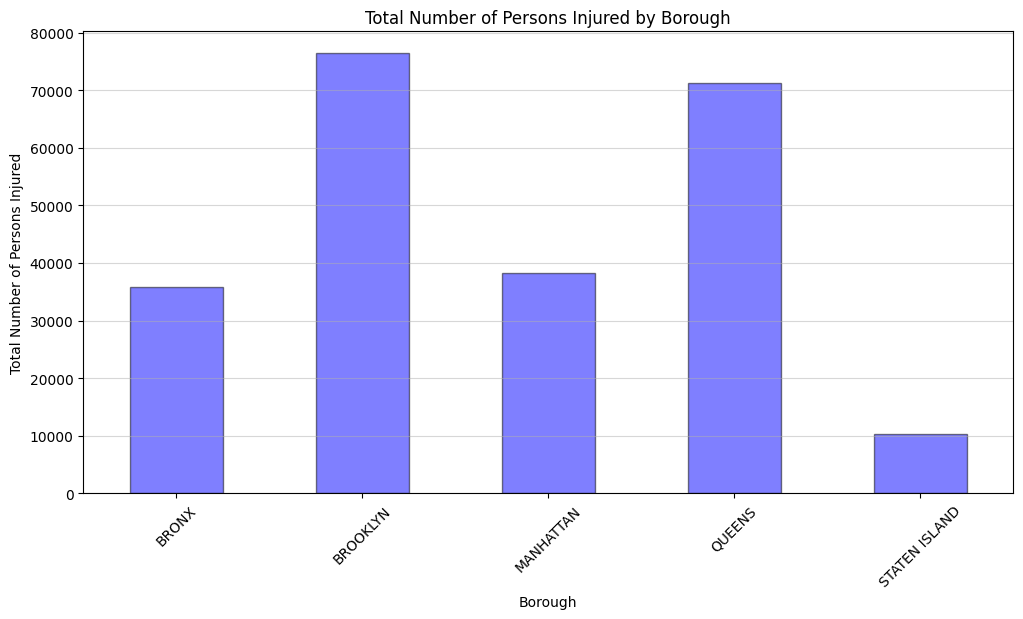

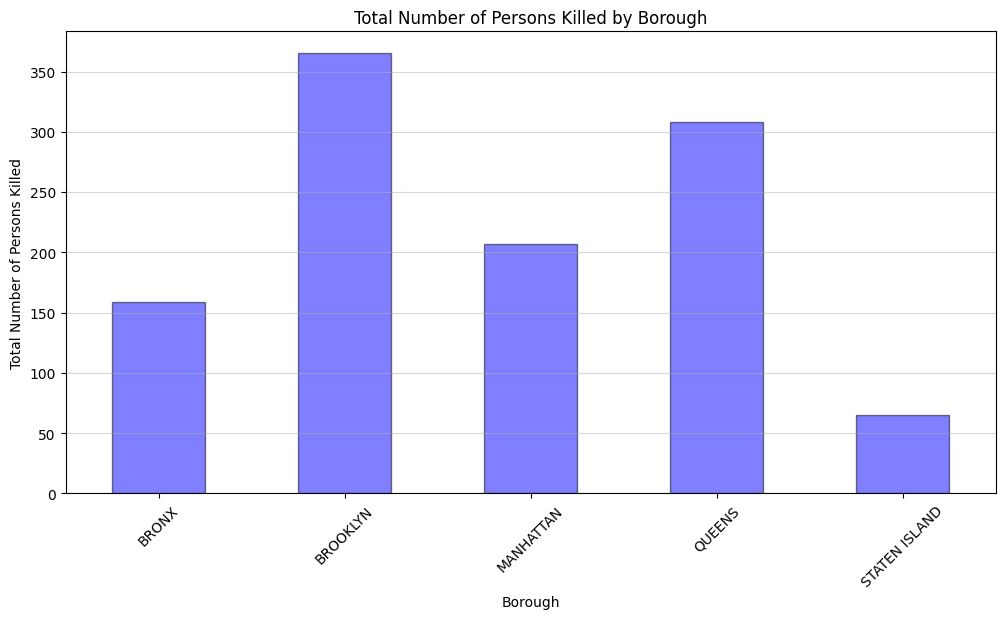

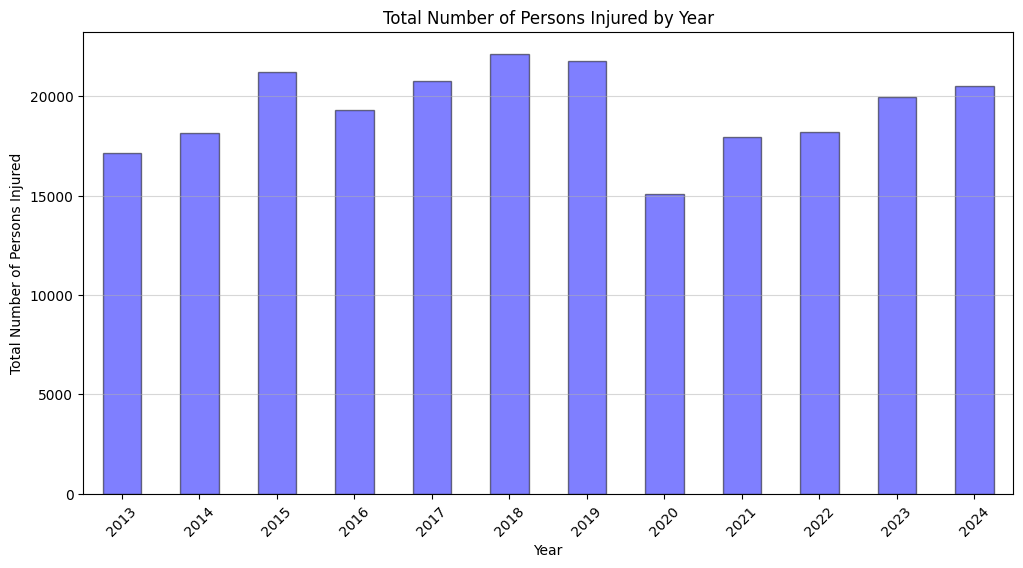

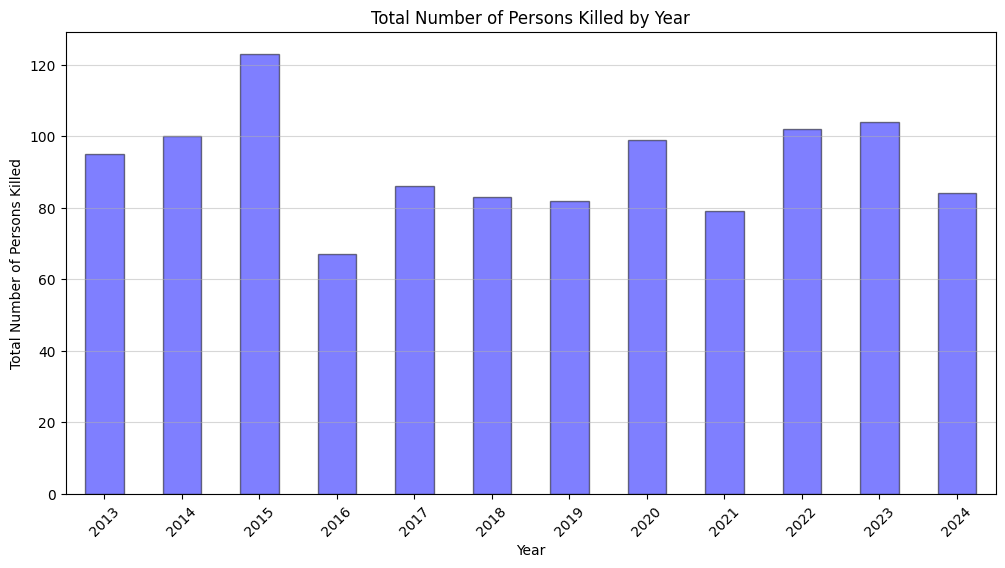

In [10]:
# Plot "number of persons injured" per borough  
plt.figure(figsize=(12, 6))
data_b = data.copy()
data_b['NUMBER OF PERSONS INJURED'].groupby(data_b['BOROUGH']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons killed" per
plt.figure(figsize=(12, 6))
data_b['NUMBER OF PERSONS KILLED'].groupby(data_b['BOROUGH']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons injured" per year
plt.figure(figsize=(12, 6))
data['NUMBER OF PERSONS INJURED'].groupby(data['Year']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Injured by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Persons Injured')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons killed" per year
plt.figure(figsize=(12, 6))
data['NUMBER OF PERSONS KILLED'].groupby(data['Year']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Killed by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Persons Killed')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

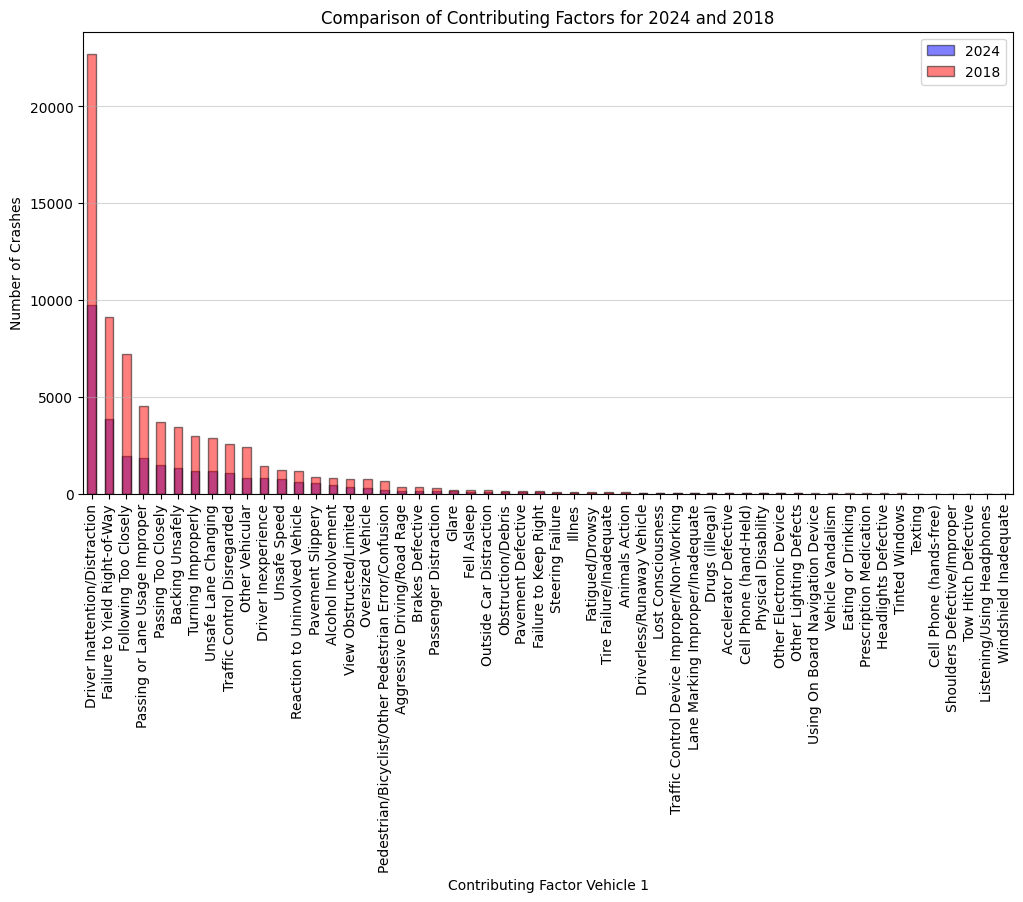

In [16]:
## Compare correlation between "CONTRIBUTING FACTOR VEHICLE 1" and "NUMBER OF PERSONS INJURED" for 2024 and 2018
plt.figure(figsize=(12, 6))
data_2024 = data[data['Year'] == 2024]
data_2018 = data[data['Year'] == 2018]
data_2024['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black', label='2024')
data_2018['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='bar', color='red', alpha=0.5, edgecolor='black', label='2018')
plt.title('Comparison of Contributing Factors for 2024 and 2018')
plt.xlabel('Contributing Factor Vehicle 1')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()


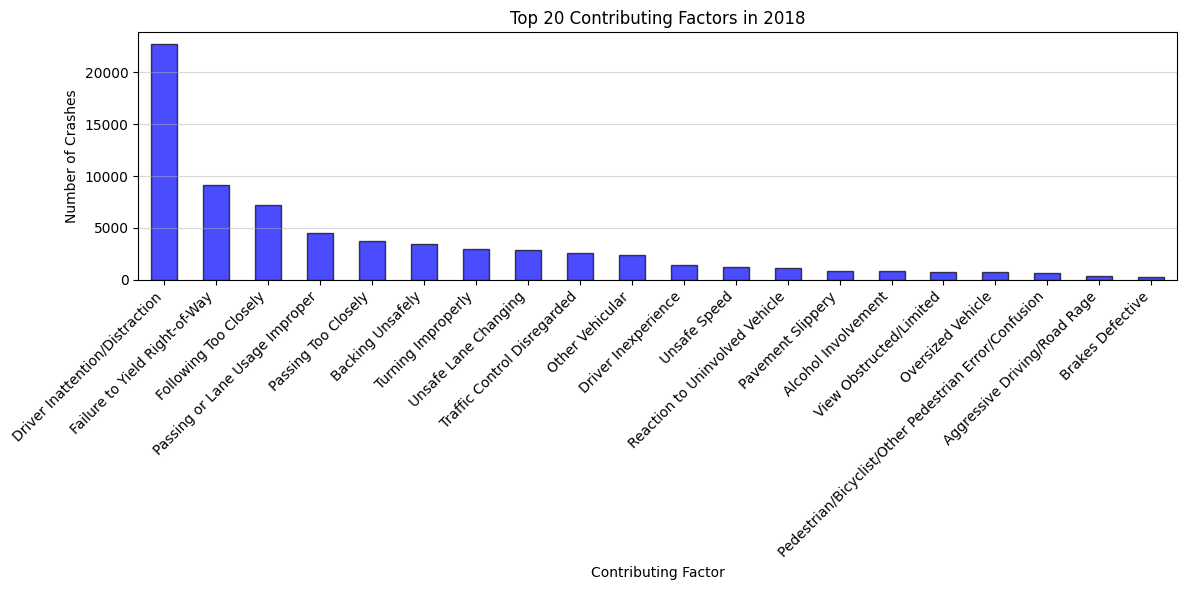

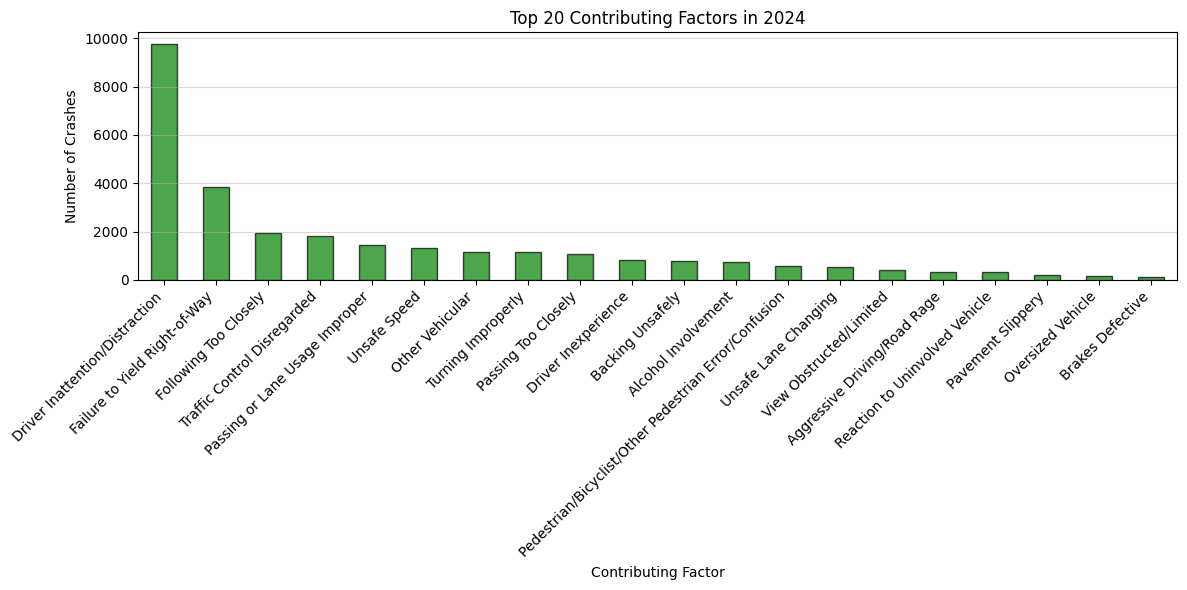

In [20]:
# Plot for 2018
plt.figure(figsize=(12, 6))
top_20_factors_2018.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2018')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot for 2024
plt.figure(figsize=(12, 6))
top_20_factors_2024.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2024')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


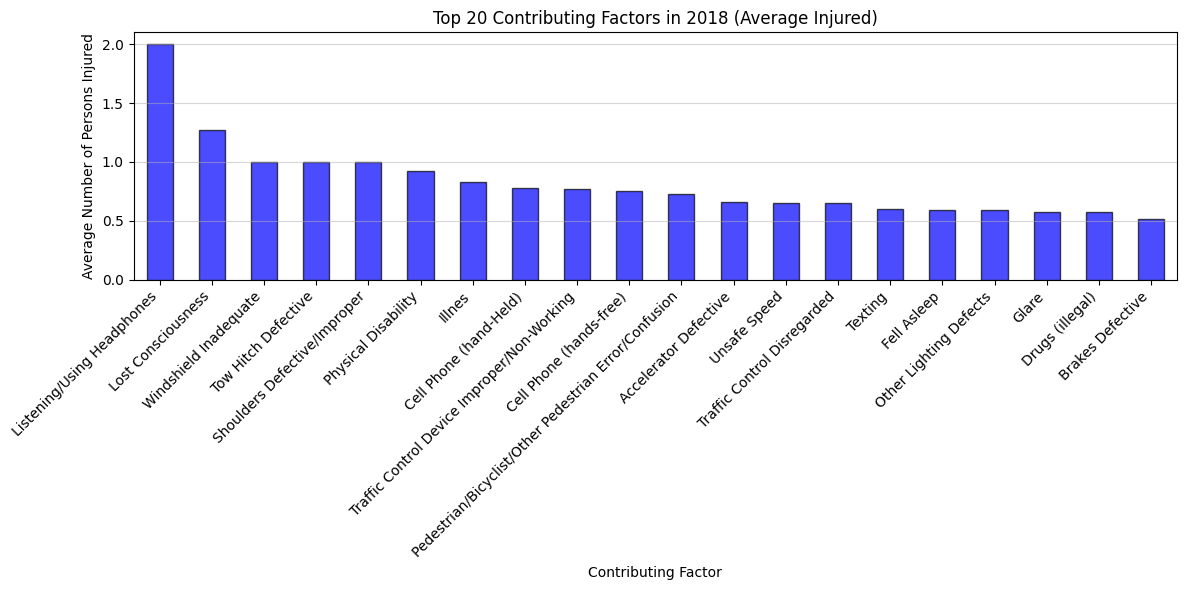

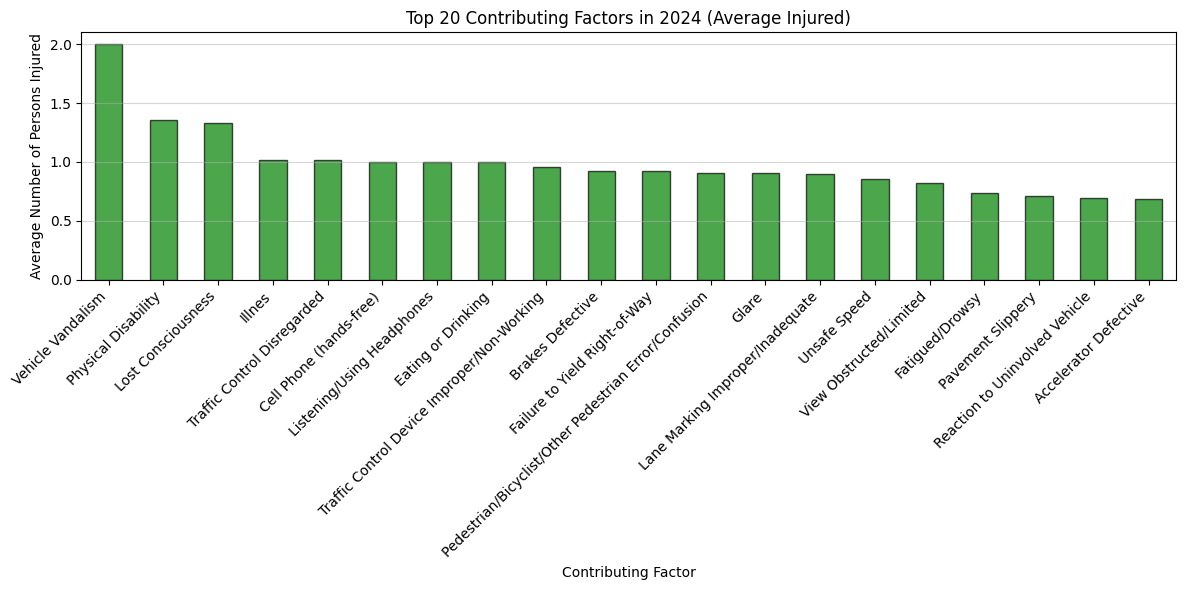

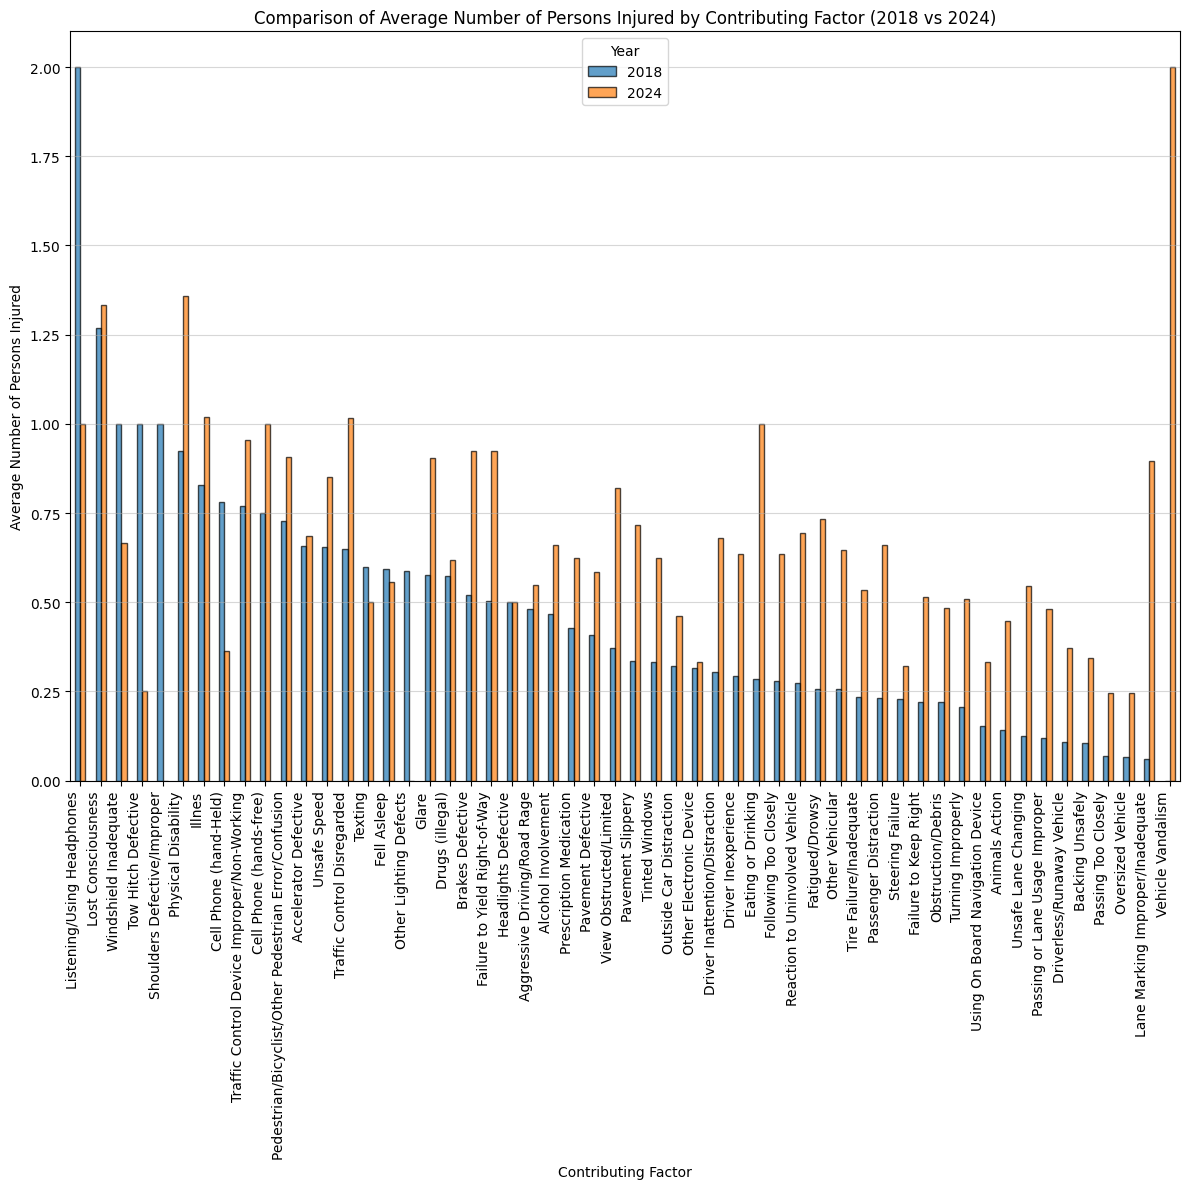

In [27]:
# Average number of persons injured for each contributing factor in 2018 and 2024
avg_injured_2018 = data_2018.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].mean().sort_values(ascending=False)
avg_injured_2024 = data_2024.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].mean().sort_values(ascending=False)

# Get the top 20 contributing factors for both years
top_20_factors_2018 = avg_injured_2018.head(20)
top_20_factors_2024 = avg_injured_2024.head(20)
# Plot for 2018
plt.figure(figsize=(12, 6))
top_20_factors_2018.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2018 (Average Injured)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
# Plot for 2024
plt.figure(figsize=(12, 6))
top_20_factors_2024.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2024 (Average Injured)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Compare the average number of persons injured for each contributing factor in 2018 and 2024
# Compare the average number of persons injured for each contributing factor in 2018 and 2024
common_factors = avg_injured_2018.index.intersection(avg_injured_2024.index)
avg_injured_comparison = pd.DataFrame({
    '2018': avg_injured_2018[common_factors],
    '2024': avg_injured_2024[common_factors]
})

avg_injured_comparison.plot(kind='bar', figsize=(12, 12), alpha=0.7, edgecolor='black')
plt.title('Comparison of Average Number of Persons Injured by Contributing Factor (2018 vs 2024)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Year')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


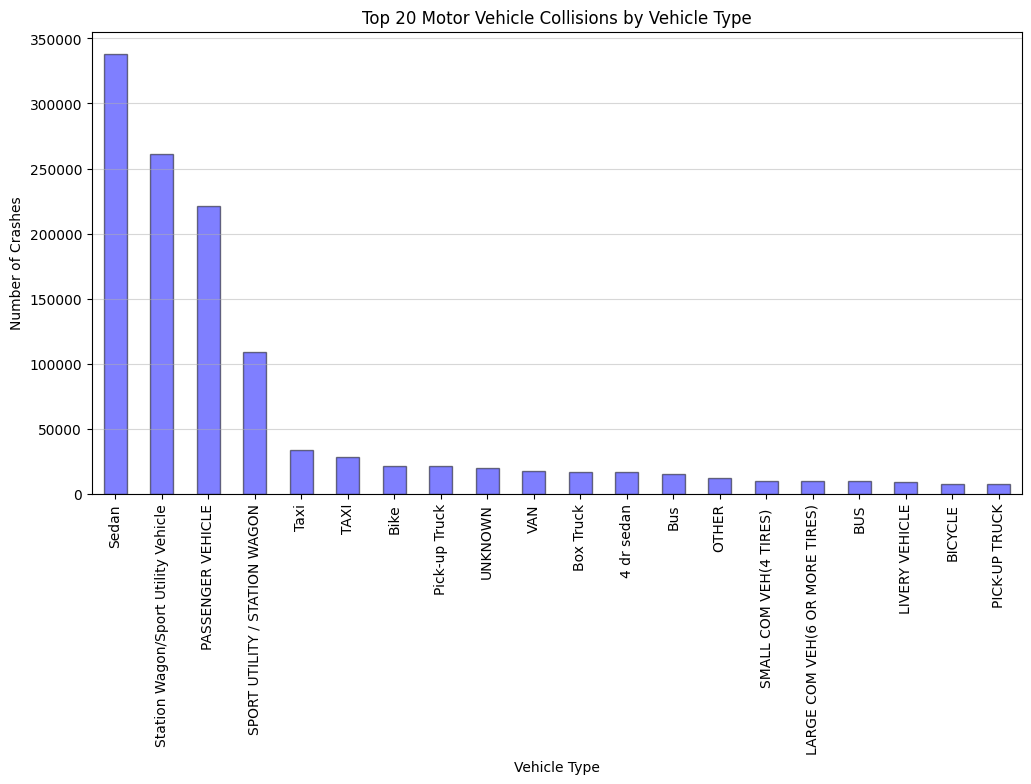

In [31]:
# plot crashes type of vehicle (merge COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5)

# Combine all vehicle type codes into a single column for analysis
vehicle_types = pd.concat([
    data['VEHICLE TYPE CODE 1'],
    data['VEHICLE TYPE CODE 2'],
    data['VEHICLE TYPE CODE 3'],
    data['VEHICLE TYPE CODE 4'],
    data['VEHICLE TYPE CODE 5']
])

# Get the 20 most common vehicle types
top_20_vehicle_types = vehicle_types.value_counts().head(20)

# Plot the crashes by the top 20 vehicle types
plt.figure(figsize=(12, 6))
top_20_vehicle_types.plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Top 20 Motor Vehicle Collisions by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [43]:
# Filter data for the 24 months from January 2019 to December 2020
map_data_filtered_24_months = map_data[(map_data['Year'] == 2019) | (map_data['Year'] == 2020)]

# Ensure latitude and longitude are floats
map_data_filtered_24_months['LATITUDE'] = map_data_filtered_24_months['LATITUDE'].astype(float)
map_data_filtered_24_months['LONGITUDE'] = map_data_filtered_24_months['LONGITUDE'].astype(float)

# Add a 'Month-Year' column for grouping
map_data_filtered_24_months['Month-Year'] = map_data_filtered_24_months['Year'].astype(str) + '-' + map_data_filtered_24_months['Month'].astype(str).str.zfill(2)

# Filter the DataFrame for rows, then columns, then remove NaNs
heat_df_filtered_24_months = map_data_filtered_24_months[['LATITUDE', 'LONGITUDE', 'Month-Year']].dropna()

# Group data by 'Month-Year' and create a list of lists for each month
heat_data_24_months = [
    [[row['LATITUDE'], row['LONGITUDE']] for _, row in heat_df_filtered_24_months[heat_df_filtered_24_months['Month-Year'] == month].iterrows()]
    for month in sorted(heat_df_filtered_24_months['Month-Year'].unique())
]

# Create a map centered around New York City
map_24_months = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Add HeatMapWithTime to the map
hm_24_months = plugins.HeatMapWithTime(heat_data_24_months, auto_play=True, max_opacity=0.8)
hm_24_months.add_to(map_24_months)

# Display the map
map_24_months


C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_filtered_24_months['LATITUDE'] = map_data_filtered_24_months['LATITUDE'].astype(float)
C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_filtered_24_months['LONGITUDE'] = map_data_filtered_24_months['LONGITUDE'].astype(float)
C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:9: SettingWithCopyWarning: 
